# Extract Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, download_plotlyjs, plot, iplot

init_notebook_mode(connected = True)

The dataset is retrived from [Kaggle Customer Churn Dataset](https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset/data).

In [4]:
df = pd.read_csv(r"/Users/macbookair/Documents/PERSONAL-PROJECT/Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Clean Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# drop RowNumber because this column basically is the index
df.drop('RowNumber', axis = 1, inplace = True)

In [8]:
# get duplicated rows
df.duplicated().sum()

0

In [9]:
# make sure that CustomerID is unique
df['CustomerId'].nunique()

10000

In [10]:
# check for any null data
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Check for values of categorical fields
cols = ['HasCrCard', 'IsActiveMember', 'Exited', 'Geography', 'Gender']
for col in cols:
    print (col)
    print(df[col].unique())
    print('\n')

HasCrCard
[1 0]


IsActiveMember
[1 0]


Exited
[1 0]


Geography
['France' 'Spain' 'Germany']


Gender
['Female' 'Male']




In [12]:
# Tranform datatype from int to str
df['CustomerId'] = df['CustomerId'].astype(str)

In [13]:
# Check for data range
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Columns CreditScore, Age, Tenure, NumOfProducts all have reasonable data ranges. 

# Preprocess Data for Tableau

In [14]:
# create a copy of the original dataset
tableau = df.copy()

In [15]:
# transform boolean data into more descriptive values
tableau['HasCrCard'] = tableau['HasCrCard'].apply(lambda x:'Has Credit Card' if x==1 else 'No Credit Card')
tableau['IsActiveMember'] = tableau['IsActiveMember'].apply(lambda x:'Active' if x==1 else 'Inactive')
tableau['Exited'] = tableau['Exited'].apply(lambda x:'Churn' if x==1 else 'Not Churn')

In [16]:
tableau.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Has Credit Card,Active,101348.88,Churn
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No Credit Card,Active,112542.58,Not Churn
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Has Credit Card,Inactive,113931.57,Churn
3,15701354,Boni,699,France,Female,39,1,0.00,2,No Credit Card,Inactive,93826.63,Not Churn
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Has Credit Card,Active,79084.10,Not Churn


In [17]:
# export the dataset into a csv file
tableau.to_csv('Churn-Tableau.csv')

# Exploratory Data Analysis

In [18]:
# add a descriptive field related to Exited
df['Churn'] = df['Exited'].apply(lambda x: 'Churn' if x == 1 else 'Not Churn')

In [19]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Churn'],
      dtype='object')

In [20]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Not Churn
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Not Churn
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Not Churn


In [23]:
# create a function that will display bar-stacked chart
def plot_bar(col):
    fig = px.bar(df.groupby(by = [col, 'Churn'])['CustomerId'].size().unstack(), y = ['Not Churn', 'Churn'])
    fig.show()
    fig.show(renderer='png')

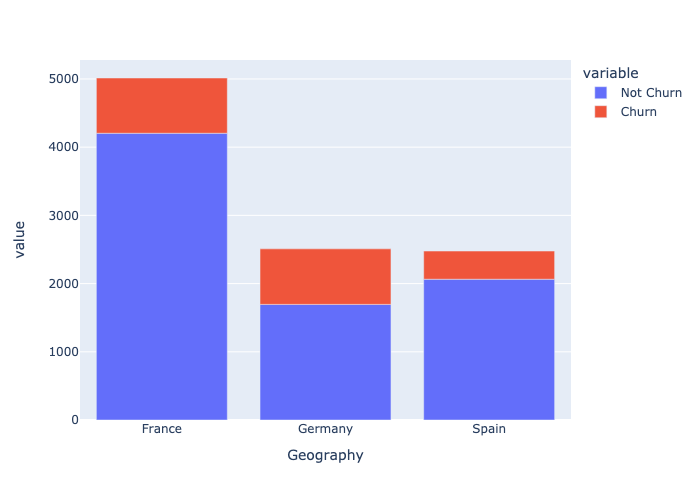

In [24]:
plot_bar('Geography')

Germany and Spain have more comparable numbers of clients, and there are more Churned customers in Germany. France has the highest number of clients, and regarding Churn ratio, Franch is the lowest among the 3 countries.

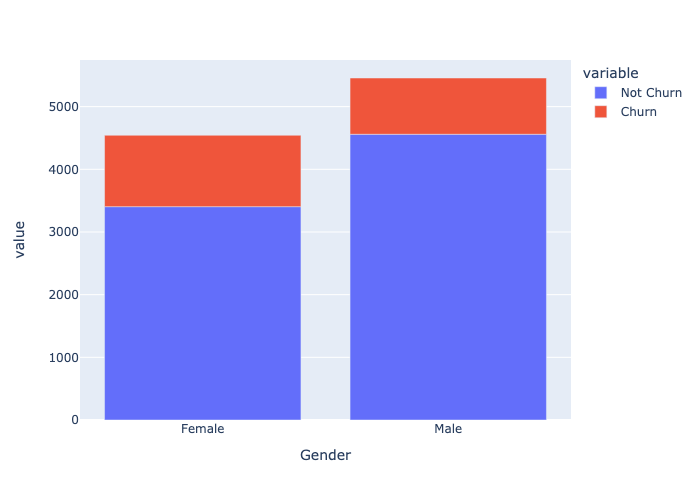

In [25]:
plot_bar('Gender')

There are fewer female clients compared to male clients, but more female clients stop using the service.

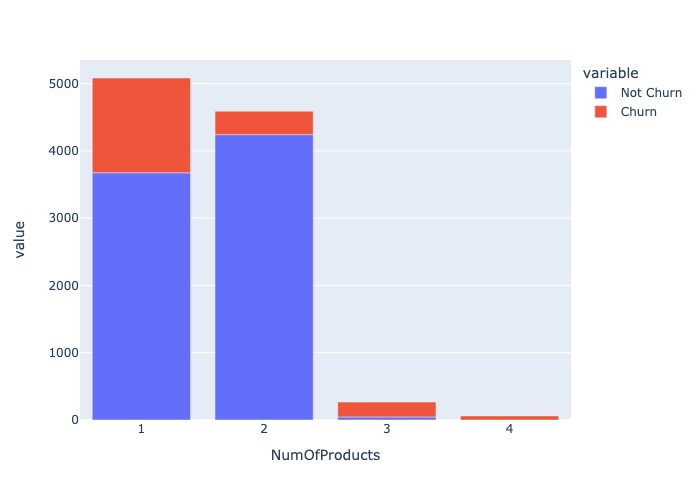

In [26]:
plot_bar('NumOfProducts')

There are fewer clients using 3 or more products, but they are more likely to exit. On the other hand, clients with 2 products are the less likely to exit, compared to clients using 1 product.

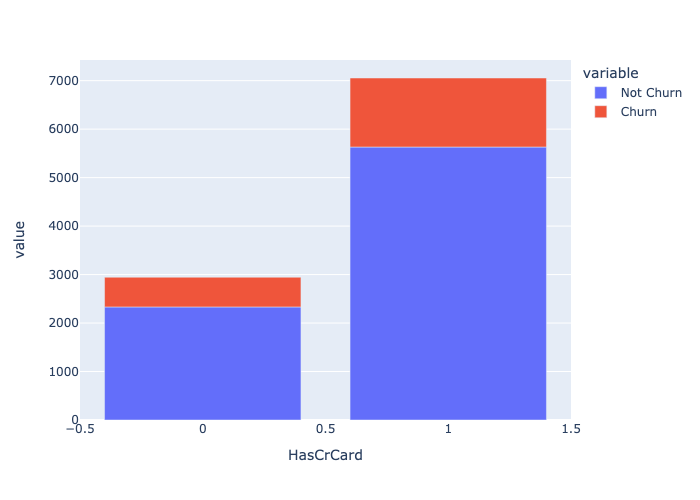

In [27]:
plot_bar('HasCrCard')

In this plot, it simply shows that there are more clients using credit cards than not using it.

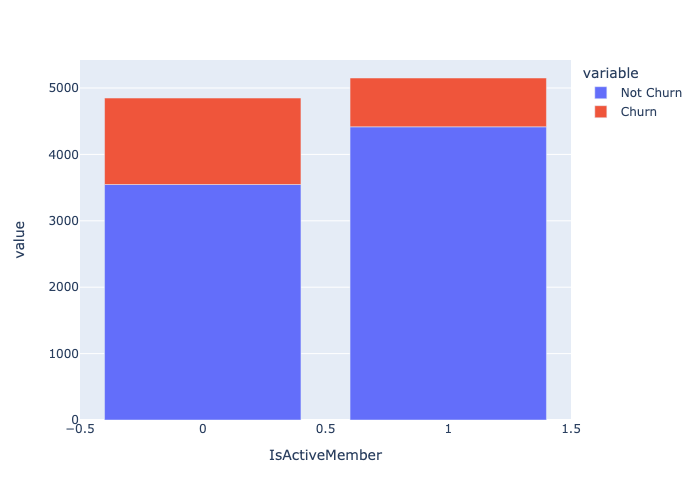

In [28]:
plot_bar('IsActiveMember')

Inactive members are more likely to exit the bank's services.

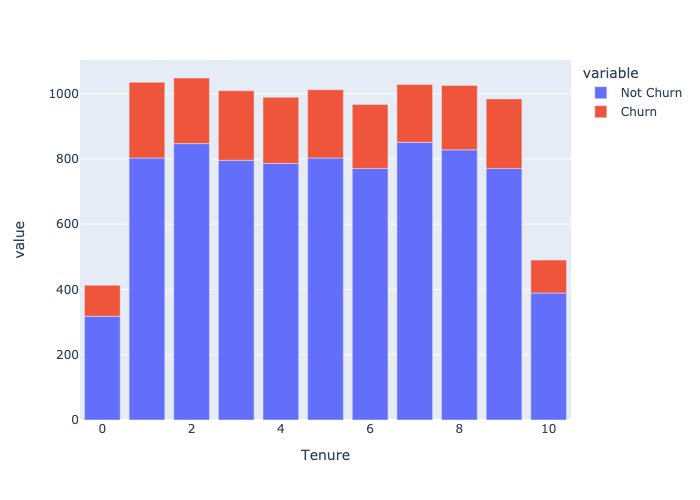

In [29]:
plot_bar('Tenure')

There is no distinctive relationship between Churn and Tenure; however, we can see that there are fewer new clients (tenure = 0) and long-term clients (tenure = 10) than other tenures' clients. It's challenging to identify the reasons why long-term clients exit based on just this dataset, but we can see that the bank is not too focusing on getting new customers. Instead, their strategies lean toward existing customers.

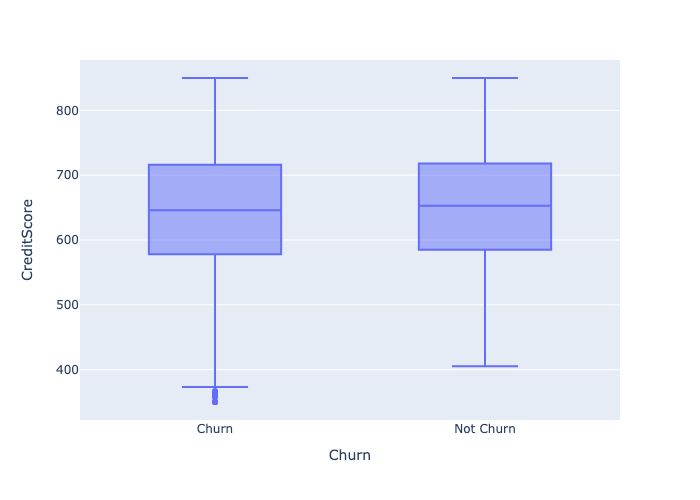

In [32]:
fig2 = px.box(df, x = 'Churn', y = 'CreditScore')
fig2.show()
fig2.show(renderer='png')

There is not much of a difference between Churn and Not Churn clients' credit scores.

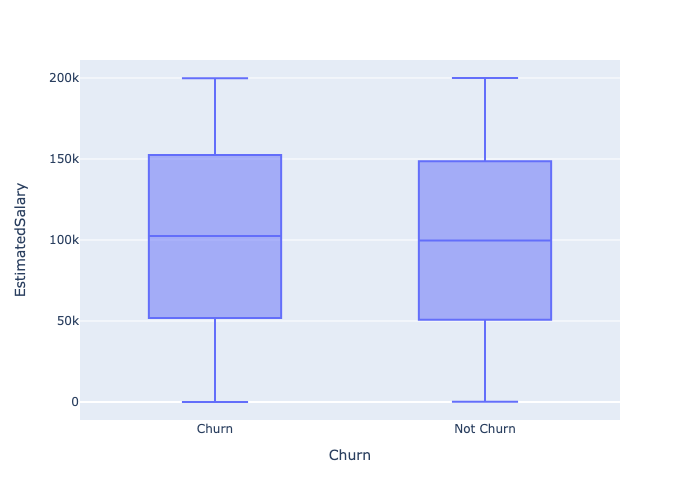

In [33]:
fig2 = px.box(df, x = 'Churn', y = 'EstimatedSalary')
fig2.show()
fig2.show(renderer='png')

There is not much of a difference between Churn and Not Churn clients' estimated salary.

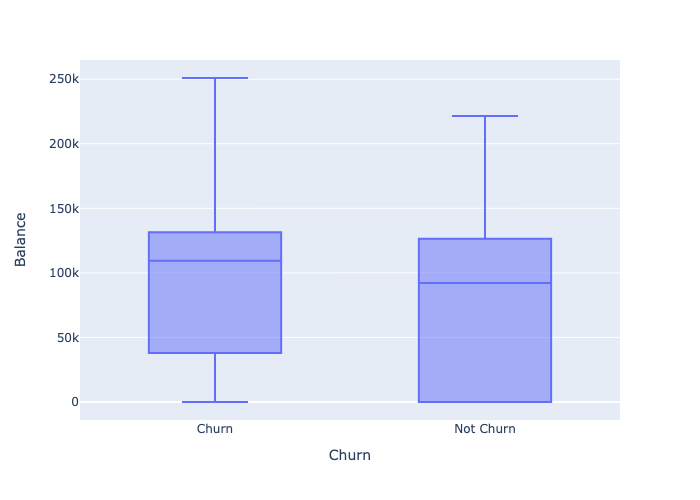

In [34]:
fig2 = px.box(df, x = 'Churn', y = 'Balance')
fig2.show()
fig2.show(renderer='png')

Regarding the clients who are not exiting, there are more clients having Balance Amount on the lower side (below ~100k).

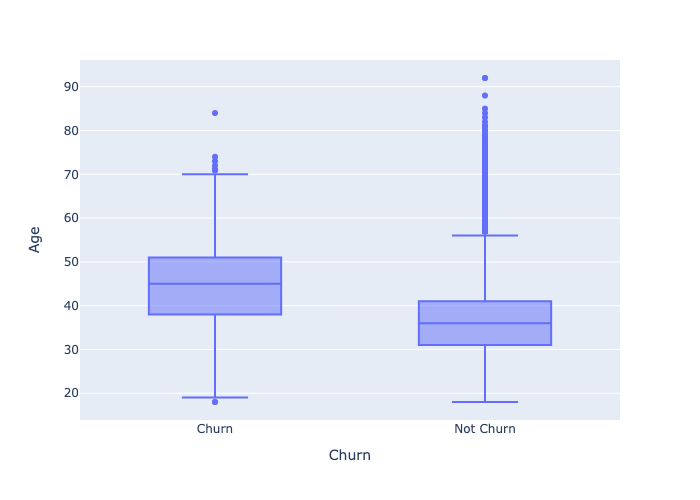

In [36]:
fig2 = px.box(df, x = 'Churn', y = 'Age')
fig2.show()
fig2.show(renderer='png')

The demography of Not Churn clients is younger than Churn clients.

# Build Model
## Feature Engineering

In [37]:
# set up dummy variables for Geography
for geo in df['Geography'].unique():
    df['Geography_'+geo] = df['Geography'].apply(lambda x: 1 if x == geo else 0)

In [38]:
# set up dummy variables for Gender (since there are only 2 genders, I will only create one for Male)
df['Gender_Male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [39]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,Geography_France,Geography_Spain,Geography_Germany,Gender_Male
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn,1,0,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Not Churn,0,1,0,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn,1,0,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Not Churn,1,0,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Not Churn,0,1,0,0


## Split train test set

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# create training and testings sets of independent variables and dependent variables
X = df.drop(['CustomerId', 'Surname', 'Geography', 'Gender', 'Churn', 'Exited'], axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
# standard scaler on independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Prediction Model
We will try with RandomForestClassifier, DecisionTree, Logistic Regression, KNN, SMV. 

There are fewer Churn clients compared to Not Churn clients, thus, I will focus more on the accuracy score of classifying Churn clients. 

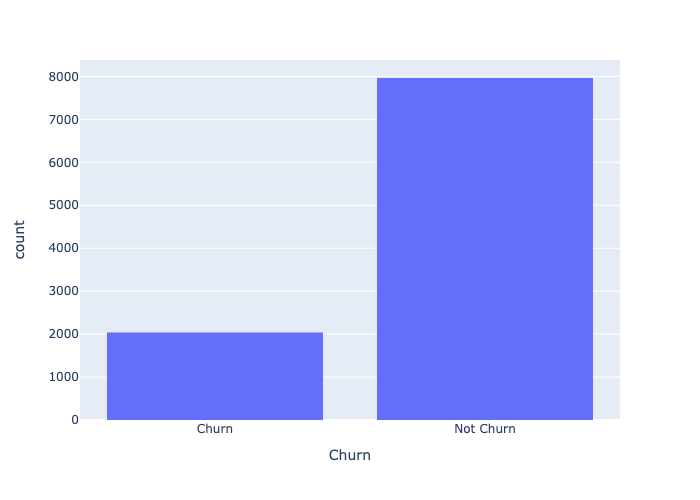

In [43]:
fig3 = px.histogram(data_frame = df, x = 'Churn')
fig3.show()
fig3.show(renderer='png')

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [45]:
from sklearn.metrics import classification_report

In [46]:
# create a function to automatically run reports for a prediction model
def predict (ml_model):
    model = ml_model.fit(X_train, y_train)
    print ('Training score: {}'.format(model.score(X_train, y_train)))
    y_pred = model.predict(X_test)
    print ('Prediction are: {}'.format(y_pred))
    print ('\n')
    print(classification_report(y_test, y_pred))

In [47]:
predict(DecisionTreeClassifier())

Training score: 1.0
Prediction are: [0 1 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1603
           1       0.49      0.53      0.51       397

    accuracy                           0.80      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.80      0.80      2000



The training score is 1.0, but the accuracy of testing is only 0.80. This indicates a case of overfitting.

In [48]:
predict(RandomForestClassifier())

Training score: 0.999875
Prediction are: [1 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1603
           1       0.75      0.51      0.61       397

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



The training score is 0.99, but the accuracy of testing is only 0.87. This indicates a case of overfitting.

In [49]:
predict(LogisticRegression())

Training score: 0.81075
Prediction are: [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1603
           1       0.59      0.21      0.31       397

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



The training score and testing accuracy is quite good (around 0.81) for a Logistic Regression model.

In [50]:
predict(SVC(kernel = 'rbf'))

Training score: 0.863125
Prediction are: [1 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1603
           1       0.83      0.41      0.55       397

    accuracy                           0.87      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.87      0.85      2000



The performance of SVC model is even better than Logistic Regression model (around 0.86).

In [51]:
predict(KNeighborsClassifier(n_neighbors = 3))

Training score: 0.893625
Prediction are: [1 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1603
           1       0.57      0.42      0.49       397

    accuracy                           0.82      2000
   macro avg       0.72      0.67      0.69      2000
weighted avg       0.81      0.82      0.81      2000



The performance of KNN is quite good as well (training score = 0.89 and accuracy = 0.82). The f1-score for Churn value is also 0.49, lower than SVC but higher than Logistic Regression.

## Hypertune Machine Learning
I will find the best parameters for each of the model using RamdomizedSearchCV.

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
models = {}
models['LogisticRegression'] = LogisticRegression()
models['DecisionTreeClassifier'] = DecisionTreeClassifier()
models['RandomForestClassifier'] = RandomForestClassifier()
models['SVC'] = SVC()
models['KNeighborsClassifier'] = KNeighborsClassifier()

In [54]:
param_grid = {
    'LogisticRegression':{'C':[0.01, 0.1, 1, 10, 100]},
    'DecisionTreeClassifier':{'max_depth':[5,10,20,30,40], 'min_samples_split':[5,10,15]},
    'RandomForestClassifier':{'n_estimators':[100,200,300], 'max_depth':[5,10,20,30,40], 
                              'min_samples_split':[5,10,15]},
    'SVC':{'C':[0.01, 0.1, 1, 10], 'kernel':['rbf', 'linear', 'poly']},
    'KNeighborsClassifier':{'n_neighbors':[3, 5, 7, 9, 11]}
}

In [55]:
# loop through all models to find the best params and best scores
for name, model in models.items():
    print ('Hypertuning for {}...'.format(name))
    rf_random = RandomizedSearchCV(estimator = model, 
                               param_distributions = param_grid[name],
                              cv = 5, n_jobs = -1)
    rf_random.fit(X_train, y_train)
    print (f'Best parameters for {name}: {rf_random.best_params_}')
    predict(rf_random.best_estimator_)

Hypertuning for LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1}
Training score: 0.810875
Prediction are: [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1603
           1       0.60      0.21      0.31       397

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000

Hypertuning for DecisionTreeClassifier...
Best parameters for DecisionTreeClassifier: {'min_samples_split': 5, 'max_depth': 5}
Training score: 0.85625
Prediction are: [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1603
           1       0.80      0.45      0.58       397

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Hypertuni

Comparing to models without hypertuning, there are several models that achieve better performance.
* Decision Tree Classifier: Lower training score but better accuracy and f1-score. Training score and accuracy are not too different, thus mitigating the problem of overfitting.
* Random Forest Classifier: Lower training score but better accuracy and f1-score. The gap between training score and prediction accuracy is reduced, thus mitigating the problem of overfitting.

There are also models that are not too different from ones without hypertuning.
* Logistic regression
* Support Vector Classifier

KKN is the only model that seemingly to do slightly worse than without hyperparameters tuning
* Lower training score and f1-score
* Higher accuracy

Overall, RandomForestClassifier (n_estimators = 200, min_samples_split = 10, max_depth = 20) is the model that achieves the best performance overall. However, one can use two other models to gain similar results:
* DecisionTreeClassifier (min_samples_split = 5, max_depth = 5)
* SVC (kernel = 'poly', C = 10)